# 实验七：支持向量机算法
### 概述
&ensp;&ensp; 本实验实现SMO算法以及带核函数的SMO算法具体应用。
### 实验环境
+ Ubuntu
+ Jupyter NoteBook

### 实验目标

&ensp;&ensp;完成本实验后，您能够
1. 进一步掌握smo算法的原理
2. 掌握使用支持向量机方法解决现实世界问题
3. 掌握如何使用带核函数的SMO算法解决实际问题

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 任务1：smo算法
#### 【任务目标】
实现smo算法
#### 【任务步骤】
1. 在每一轮坐标下降算法搜索中，依次循环地选取分量i与j
2. 更新Lambda_i与Lambda_j的取值
3. 检验Lambda_i与Lambda_j是否大于0，更新b的值
4. 计算原始变量w的值，输出模型h(x)

In [105]:
"""
类说明：SVM
    编写代码实现支持向量机算法
    
Parameters:
      Lambda   - 拉格朗日乘子
      i, j     - 分量
      y        - 标签
      N        - 搜索步数
Returns:
"""
class SVM:
    def get_H(self, Lambda, i, j, y):
        if y[i]==y[j]:
            return Lambda[i] + Lambda[j]
        else:
            return float("inf")
    
    def get_L(self, Lambda, i, j, y):
        if y[i]==y[j]:
            return 0.0
        else:
            return max(0, Lambda[j] - Lambda[i])
            
    def smo(self, X, y, K, N):
        m, n = X.shape
#####  Start Code Here  #####
        # 初始化Lambda的值
    
    
        epsilon = 1e-6
        
        # N轮坐标下降搜索
        for t in range(N):
            for i in range(m):
                for j in range(m):
                    # 计算D_ij
                      
                      
                    # 判断，如果分母D_ij十分接近0，则跳过该循环
                      
                    
                    # 计算E_i
                   
                
                    # 计算E_i
                    
                    
                    delta_j = 1.0 * y[j] * (E_j - E_i) / D_ij
                    
                    # 计算H_ij
                    
                    
                    # 计算L_ij
                    
                    
                    # 调整delta_j的值
                    
                    
                    # 计算Lambda_i的取值
                    
                    
                    # 维护b的值
                    if Lambda[i] > epsilon:
                        b = y[i] - K[:, i].dot(Lambda * y)
                    elif Lambda[j] > epsilon:
                        b = y[j] - K[:, j].dot(Lambda * y)
                    
        self.Lambda = Lambda
        self.b = b
        
    def fit(self, X, y, N = 10):
        # 计算方阵K
       
    
        # 调用smo函数计算最优解Lambda以及b
       
    
        # 计算最优解中的w
        
           
    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)
#####  End Code Here  #####    

### 任务2：实现SMO算法的具体应用
#### 【任务内容】
山鸢尾预测问题的支持向量机算法
#### 【任务目标】
对山鸢尾的训练数据，采用支持向量机算法来计算正负采样的分离直线，并将正负采样对测试数据的正负采样分离。
#### 【任务步骤】
1. 可视化优化过程
2. 加载鸢尾花数据集
3. 对训练集和测试集进行特征处理
4. 按照一定比例划分训练集和测试集
5. 训练模型

In [ ]:
def plot_figure(X, y, model):
    z = np.linspace(4, 8, 200)
    w = model.w
    b = model.b
    L = - w[0] / w[1] * z - b / w[1]
    plt.plot(X[:, 0][y[:, 0]==1], X[:, 1][y[:, 0]==1], "bs",  ms=3)
    plt.plot(X[:, 0][y[:, 0]==-1], X[:, 1][y[:, 0]==-1], "yo",  ms=3)
    plt.plot(z, L)
    plt.show()
#####  Start Code Here  #####    
# 加载鸢尾花数据集


# 处理数据和标签


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

# 定义模型


#训练模型


plot_figure(X_train, y_train, model)
plot_figure(X_test, y_test, model)

#####  End Code Here  #####  

### 任务3：带核函数的SMO算法
#### 【任务目标】
实现带核函数的SMO算法
#### 【任务步骤】
1. 由KernelSVM的构造函数传入指定的核函数kernel
2. 计算矩阵K
3. 实现fit函数中训练带核函数的支持向量机模型
4. 对测试数据进行预测

In [103]:
class KernelSVM(SVM):         
    def __init__(self, kernel = None):
        self.kernel = kernel
#####  Start Code Here  #####  
    # 计算矩阵K
    def get_K(self, X_1, X_2):
        
        
    
    # 实现fit函数中训练带核函数的支持向量机模型
    def fit(self, X, y, N=10):
     
    
    
    # 对测试数据进行预测
    def predict(self, X):
        
        
        
 #####  End Code Here  #####  

### 任务4：实现带核函数的SMO算法具体应用
#### 【任务内容】
&ensp;&ensp;改进SMO算法来实现高维投影的核函数方法。在葡萄酒识别数据集中，包括了三种不同种类酒中13种不同成分的含量，13种成分有酒精、苹果酸、灰、灰分的碱度等，葡萄酒识别问题任务是根据葡萄酒中的酒精含量和苹果酸含量判断给定葡萄酒是否为第二类葡萄酒。使用Sklearn数据库中的葡萄酒数据集，仅对每个样本的葡萄酒的标签作了变动，如果是第二类葡萄酒，则标签值为+1，否则标签值为-1。
#### 【任务目标】
根据带核函数的SMO算法判断葡萄酒样本是否为第二类葡萄酒
#### 【任务步骤】
1. 实现高斯核函数
2. 加载葡萄酒识别数据集
3. 对训练集和测试集进行特征处理
4. 按照一定比例划分训练集和测试集
5. 调用KernelSVM训练模型
6. 用作图工具绘制模型预测边界

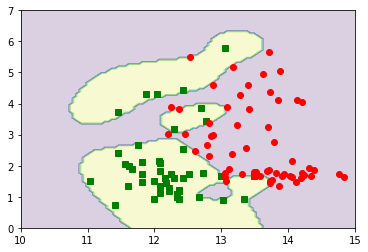

In [80]:
# 实现高斯核函数
def rbf_kernel(x1, x2):

    
    
# 加载葡萄酒识别数据集  
wine = datasets.load_wine()

# 处理数据和标签
X= wine["data"][:,(0,1)]
y = 2 * (wine["target"]==1).astype(np.int64).reshape(-1,1) - 1

# 按照一定比例划分训练集和测试集（测试集占0.4）


# 定义KernelSVM模型


# 训练模型

y_pred=model.predict(X_test)

# 用Pyplot作图工具绘制模型预测边界
x0s = np.linspace(10, 15, 100)
x1s = np.linspace(0, 7, 100)
x0, x1 = np.meshgrid(x0s, x1s)
W = np.c_[x0.ravel(), x1.ravel()]
u= model.predict(W).reshape(x0.shape)
plt.plot(X_train[:, 0][y_train[:,0]==1] , X_train[:, 1][y_train[:,0]==1], "gs")
plt.plot(X_train[:, 0][y_train[:,0]==-1], X_train[:, 1][y_train[:,0]==-1], "ro")
plt.contourf(x0, x1, u, alpha=0.2)
plt.show()

In [ ]:
#计算指标
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("accuracy = {}".format(accuracy))
print("precision = {}".format(precision))
print("recall = {}".format(recall))
print("f1 = {}".format(f1))